In [32]:
"""
f = open("report_daniel2.out").readlines()

report = ""

for line in f:
    n_line = line[1:5]+"-"+line[6:8].strip().rjust(2,"0")+"-"\
    +line[8:10].strip().rjust(2,"0")+" "+line[11:13].strip().rjust(2,"0")\
    +":"+line[13:15].strip().rjust(2,"0")+":"+\
   "00"+"\n"
    report = report+n_line
    #print n_line

with open("report_daniel3.out", "w") as f2:
    f2.write(report)

"""

'\nf = open("report_daniel2.out").readlines()\n\nreport = ""\n\nfor line in f:\n    n_line = line[1:5]+"-"+line[6:8].strip().rjust(2,"0")+"-"    +line[8:10].strip().rjust(2,"0")+" "+line[11:13].strip().rjust(2,"0")    +":"+line[13:15].strip().rjust(2,"0")+":"+   "00"+"\n"\n    report = report+n_line\n    #print n_line\n\nwith open("report_daniel3.out", "w") as f2:\n    f2.write(report)\n\n'

In [64]:
import pandas as pd
import numpy as np
from obspy import UTCDateTime

def int2weekday(x):
    days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    return days[x]

def prepare_heat_map(file_name):
    
    #df = pd.read_csv("report_daniel3.out", header=None, names=["Time"])
    df = pd.read_csv(file_name, header=0, names=["Time"])
    df.fillna(0)

    df["weekday"] = pd.to_datetime(df["Time"]).dt.date.apply(lambda x: x.weekday())
    df["hour"] = pd.to_datetime(df["Time"]).dt.hour

    df["weekday"] = df["weekday"].apply(int2weekday)


    h_map = df.groupby(["weekday", "hour"]).size().reset_index(name="data")

    h_map2 = h_map.pivot("weekday","hour", "data").fillna(0).reindex([
        "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    
    return h_map2

heat_map = prepare_heat_map("report_dates_less3.out")
heat_map2 = prepare_heat_map("report_dates_greater3.out")

M <= 3


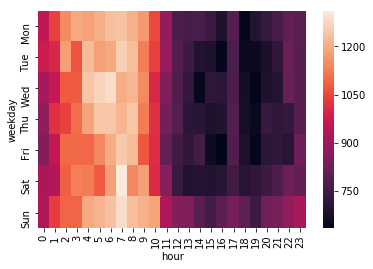

In [65]:
import seaborn as sns
%matplotlib inline
ax = sns.heatmap(heat_map)
print "M <= 3"

M > 3


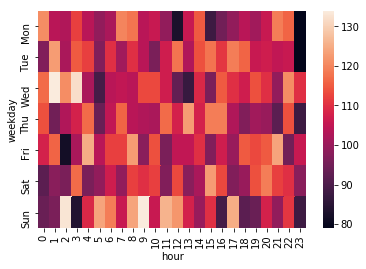

In [66]:
ax = sns.heatmap(heat_map2)
print "M > 3"

In [59]:
sns.heatmap?